In [8]:
from PIL import Image
import torch
import argparse
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchsummary import summary
import cv2

import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F


from torchvision import transforms
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from PIL import Image
import bqplot.scales
import ipyvolume as ipv
import bqplot.scales
import numpy as np
import ipywidgets as widgets

In [2]:
import ipyvolume as ipv

def visualize_3D_points_in_jupyter(points_3D, size=2, marker="sphere"):
    # Assuming points_3D is a N x 3 numpy array
    x = points_3D[:, 0]
    y = points_3D[:, 1]
    z = points_3D[:, 2]

    ipv.quickscatter(x, y, z, size=size, marker=marker)
    ipv.show()

def voxel_to_coordinates(voxel_data, voxel_size=0.01, threshold = 0):
    # 获取体素数据的形状
    xx, yy, zz = voxel_data.shape

    # 初始化坐标和标签列表
    x_coords = []
    y_coords = []
    z_coords = []
    tags = []

    # 遍历体素数据
    for x in range(xx):
        for y in range(yy):
            for z in range(zz):
                tag = voxel_data[x, y, z]
                # 只记录非零标签的体素
                if tag > threshold:
                    x_coords.append(x * voxel_size)
                    y_coords.append(y * voxel_size)
                    z_coords.append(z * voxel_size)
                    tags.append(tag)

    return np.array(x_coords), np.array(y_coords), np.array(z_coords), np.array(tags)



def visualize_voxels(voxel_data, size=0.1, marker='box'):

        x, y, z, tags = voxel_to_coordinates(voxel_data, voxel_size = 1 / voxel_data.shape[0])

        # 创建颜色比例尺
        color_scale = bqplot.scales.ColorScale(min=0, max=255, colors=["#f00", "#0f0", "#00f"])

        fig = ipv.figure()

        # 确定tags中的唯一值
        unique_tags = np.unique(tags)

        # 为每个唯一的tag值创建一个scatter
        for tag in unique_tags:
            # 过滤出当前tag的坐标
            mask = tags == tag
            x_filtered, y_filtered, z_filtered, tags_f = x[mask], y[mask], z[mask], tags[mask]
            # 创建scatter
            ipv.scatter(1-y_filtered,x_filtered, z_filtered, color=tags_f, color_scale=color_scale, marker=marker, size=size, description="len({})={}".format(str(tag),x_filtered.shape[0]))

        ipv.xyzlabel('y','x','z')
        ipv.view(0, -50, distance=2.5)
        ipv.show()


3632


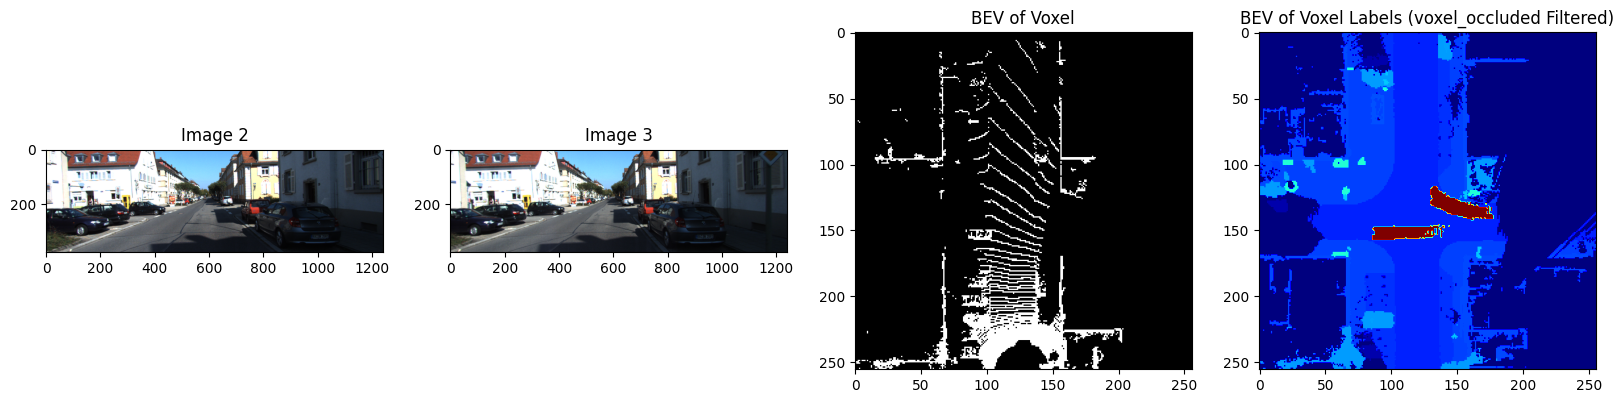

In [3]:
import torch
torch.cuda.is_available()
KITTI_DIR = "/workspace/Dataset/dataset"


import sys
sys.path.append("/workspace/HKU-OccNet/")

from dataset.loader import SemanticKITTIDataset


dataset = SemanticKITTIDataset(root_dir=KITTI_DIR, mode='train', sequences=['00'])
print(len(dataset))

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
len(dataloader)

dataset.plot(66)


In [4]:
# import random
# d = dataset.get_dict(55)

In [5]:
# d.keys()

In [6]:
# plt.imshow(d["image2"])

In [7]:
# plt.imshow(d["image3"])

In [8]:
# print(d["voxel"].shape)
# print(type(d["voxel"]))
# np.unique(d["voxel"])

In [9]:
# print(d["voxel_labels"].shape)
# print(type(d["voxel_labels"]))
# print(np.unique(d["voxel_labels"]))
# len(np.unique(d["voxel_labels"]))


In [10]:
# print(d["voxel_invalid"].shape)
# print(type(d["voxel_invalid"]))
# np.unique(d["voxel_invalid"])

In [11]:
# print(d["voxel_occluded"].shape)
# print(type(d["voxel_occluded"]))
# np.unique(d["voxel_occluded"])

In [12]:
#plt.imshow(dataset.get_dict(666)['image2'])
#dataset.visualize_voxels(666, key='voxel_labels' , size=1, marker=None) #origin at mid point of y 

In [13]:
# d = dataset.get_dict(666)
# vox_lidar = d["voxel"]
# vox_labels = d["voxel_labels"]
# vox_occ = d["voxel_occluded"]
# vox_invalid = d["voxel_invalid"]

In [14]:
# vox_labels.shape == vox_invalid.shape
# np.unique(vox_labels * (1 - vox_invalid))
# np.unique(vox_labels * vox_occ)

In [15]:
#visualize_voxels(vox_labels, key = 'voxel_labels',size = 1, marker = 'box')

In [16]:
# visualize_voxels(vox_labels * (1 - vox_invalid) * vox_occ, size = 1, marker = 'box')

In [17]:
# np.unique(vox_labels * (1 - vox_invalid) * vox_occ == vox_labels)

In [3]:
sys.path.append("/workspace/HKU-OccNet/")

from utils.header import Header


In [4]:
header = Header(class_num=20, feature=128)

In [5]:
header

Header(
  (mlp_head): Sequential(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=128, out_features=20, bias=True)
  )
  (up_scale_2): Upsample(scale_factor=2.0, mode=trilinear)
)

In [8]:
# Define the dimensions
batch_size = 1
channels = 128  # Feature size expected by LayerNorm
depth = 128      
height = 128     
width = 16    

# Generate a random input tensor
random_input = torch.randn(batch_size, channels, int(depth), int(height), int(width))

# Print the shape of the generated input
print("Shape of the generated input:", random_input.shape)


Shape of the generated input: torch.Size([1, 128, 128, 128, 16])


In [9]:
header(random_input).shape

torch.Size([1, 20, 256, 256, 32])

In [25]:
left_image, right_image, voxel_data, voxel_labels, voxel_occluded, voxel_invalid = dataset.__getitem__(1234)


In [26]:
print(left_image.min(), left_image.max())
print(right_image.min(), right_image.max())
print(left_image.dtype)
print(right_image.dtype)
print(voxel_labels.dtype)
print(voxel_occluded.dtype)
print(left_image.shape)
print(right_image.shape)
print(voxel_labels.shape)
print(voxel_occluded.shape)

tensor(-2.1179) tensor(2.6400)
tensor(-2.1179) tensor(2.6400)
torch.float32
torch.float32
torch.int64
torch.float32
torch.Size([3, 376, 1241])
torch.Size([3, 376, 1241])
torch.Size([256, 256, 32])
torch.Size([256, 256, 32])


In [27]:
def plotTorchImg(img_tensor):
    tensor = img_tensor.permute(1, 2, 0)
    tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
    plt.imshow(tensor)

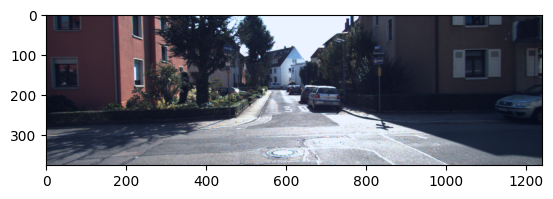

In [28]:
plotTorchImg(left_image)

In [29]:
print(torch.unique(voxel_labels))
print(torch.unique(voxel_occluded))

tensor([ 0,  1,  2,  9, 11, 13, 14, 15, 16, 17, 18, 19])
tensor([0., 1.])


In [30]:
voxel_labels.numpy().shape

(256, 256, 32)

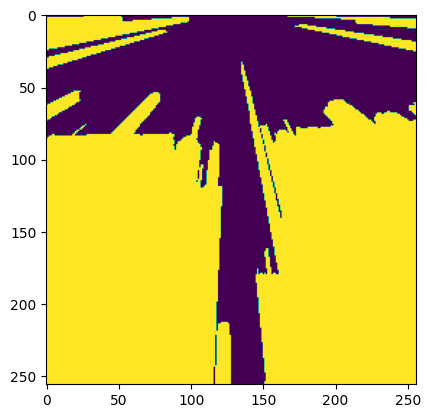

In [36]:
plt.imshow(voxel_occluded[:, :, 10])

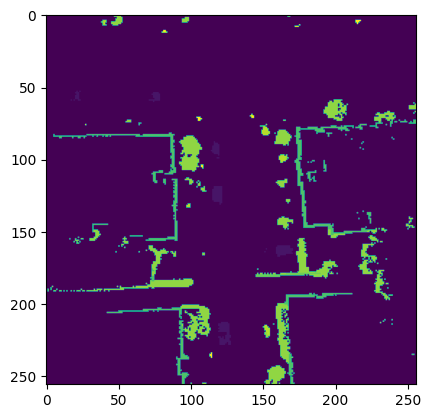

In [37]:
plt.imshow(voxel_labels[:, :, 10])

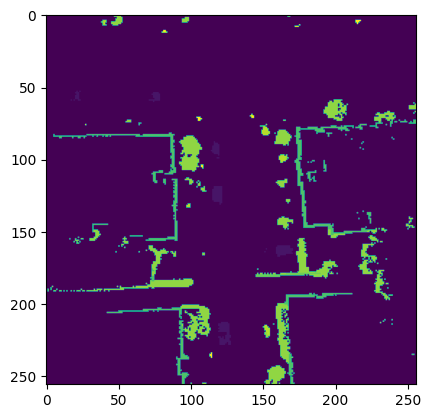

In [38]:
plt.imshow(voxel_occluded[:, :, 10] * voxel_labels[:, :, 10])

In [39]:
semantic_kitti_class_frequencies = np.array(
    [
        5.41773033e09,
        1.57835390e07,
        1.25136000e05,
        1.18809000e05,
        6.46799000e05,
        8.21951000e05,
        2.62978000e05,
        2.83696000e05,
        2.04750000e05,
        6.16887030e07,
        4.50296100e06,
        4.48836500e07,
        2.26992300e06,
        5.68402180e07,
        1.57196520e07,
        1.58442623e08,
        2.06162300e06,
        3.69705220e07,
        1.15198800e06,
        3.34146000e05,
    ]
)
kitti_class_names = [
    "empty",
    "car",
    "bicycle",
    "motorcycle",
    "truck",
    "other-vehicle",
    "person",
    "bicyclist",
    "motorcyclist",
    "road",
    "parking",
    "sidewalk",
    "other-ground",
    "building",
    "fence",
    "vegetation",
    "trunk",
    "terrain",
    "pole",
    "traffic-sign",
]

class_weights = torch.from_numpy(
    1 / np.log(semantic_kitti_class_frequencies + 0.001)
)


#scene_size = (51.2, 51.2, 6.4) #unit m, 51.2m = 256 * 0.2m
#vox_origin = np.array([0, -25.6, -2])
#self.voxel_size = 0.2  # 0.2m
#self.img_W = 1220
#self.img_H = 370

In [40]:
len(kitti_class_names)

20

In [41]:
torch.unique(voxel_labels)

tensor([ 0,  1,  2,  9, 11, 13, 14, 15, 16, 17, 18, 19])

In [60]:
from utils.ssc_loss import sem_scal_loss, geo_scal_loss, CE_ssc_loss

tensor = torch.randn(256, 256, 32)  # A 3x3x3 tensor

# Probability of an element being set to zero
p_zero = 0.2

# Create a random mask
mask = (torch.rand(tensor.size()) > p_zero).float()



voxel_pred = voxel_labels * mask

#num_classes = len(kitti_class_names) # 0-empty, 1~19class
num_classes = 20
voxel_pred_1h = F.one_hot(voxel_pred.to(torch.int64), num_classes).permute(3, 0, 1, 2)
voxel_gt_1h = F.one_hot(voxel_labels.to(torch.int64), num_classes).permute(3, 0, 1, 2)
batched_voxel_pred_1h = voxel_pred_1h.unsqueeze(0).double()
batched_voxel_gt_1h = voxel_gt_1h.unsqueeze(0).double()



In [61]:
torch.argmax(batched_voxel_pred_1h, dim=1)[0,:,:,:].shape

torch.Size([256, 256, 32])

In [62]:
voxel_labels.shape

torch.Size([256, 256, 32])

In [63]:
torch.unique(torch.argmax(batched_voxel_pred_1h, dim=1)[0,:,:,:] == voxel_labels)

tensor([False,  True])

In [64]:
print(sem_scal_loss(batched_voxel_pred_1h, voxel_labels.unsqueeze(0)))
print(sem_scal_loss(batched_voxel_gt_1h, voxel_labels.unsqueeze(0)))


tensor(7.7318, dtype=torch.float64)
tensor(7.4888, dtype=torch.float64)


In [65]:
print(geo_scal_loss(batched_voxel_pred_1h, voxel_labels.unsqueeze(0)))
print(geo_scal_loss(batched_voxel_gt_1h, voxel_labels.unsqueeze(0)))

tensor(4.9954, dtype=torch.float64)
tensor(4.9628, dtype=torch.float64)


In [67]:
print(CE_ssc_loss(batched_voxel_pred_1h, voxel_labels.unsqueeze(0), class_weights))
print(CE_ssc_loss(batched_voxel_gt_1h, voxel_labels.unsqueeze(0), class_weights))

tensor(0.0945, dtype=torch.float64)
tensor(0.0939, dtype=torch.float64)


In [ ]:
torch.unique(voxel_pred)

In [ ]:
batched_voxel_pred_1h.shape

In [13]:
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# prepare image for the model
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


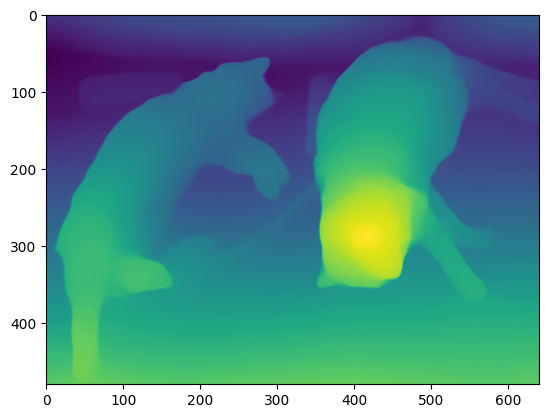

In [12]:
plt.imshow(depth)

In [27]:
inputs['pixel_values'].shape

torch.Size([1, 3, 384, 384])

In [29]:
print("Number of parameters (in millions):", sum(p.numel() for p in model.parameters() if p.requires_grad) / 1_000_000, 'M')


Number of parameters (in millions): 343.030465 M


In [5]:
from transformers import GLPNImageProcessor, GLPNForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = GLPNImageProcessor.from_pretrained("vinvino02/glpn-kitti")
model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-kitti")

# prepare image for the model
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)


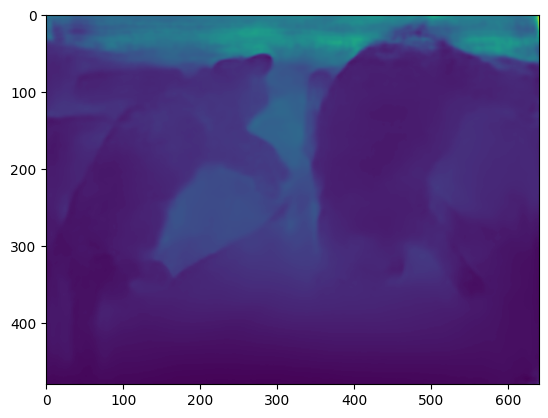

In [10]:
plt.imshow(depth)